In [1]:
## Importing Basic packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Read the Dataset
df= pd.read_csv("pima_indian_diabetes.csv")
df.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000


In [12]:
## Checking NUll Values in the data sets.

print("Any null values in the data sets : (T/F) - ", df.isnull().values.any())
print(df.isnull().sum())


Any null values in the data sets : (T/F) -  False
No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64


In [33]:
## Focus on plotting part tounderstand the linear relationship.
## Using Seaborn -- is an high level python visualisation linbrary, which is an extention of matplot.
## feature are built in themes.

import seaborn as sns

def sns_boxplt(x_col,y_col,x_lab,y_lab):
    sns.set_style("white")
    sns.boxplot(data=df,x=x_col,y=y_col)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(x_lab + " vs "+ y_lab)
    

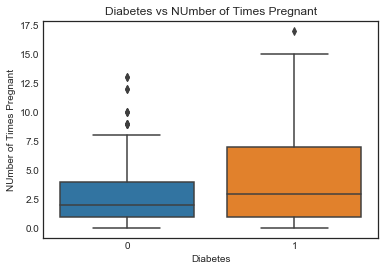

In [35]:
sns_boxplt("Diabetes","No_Times_Pregnant","Diabetes","NUmber of Times Pregnant")

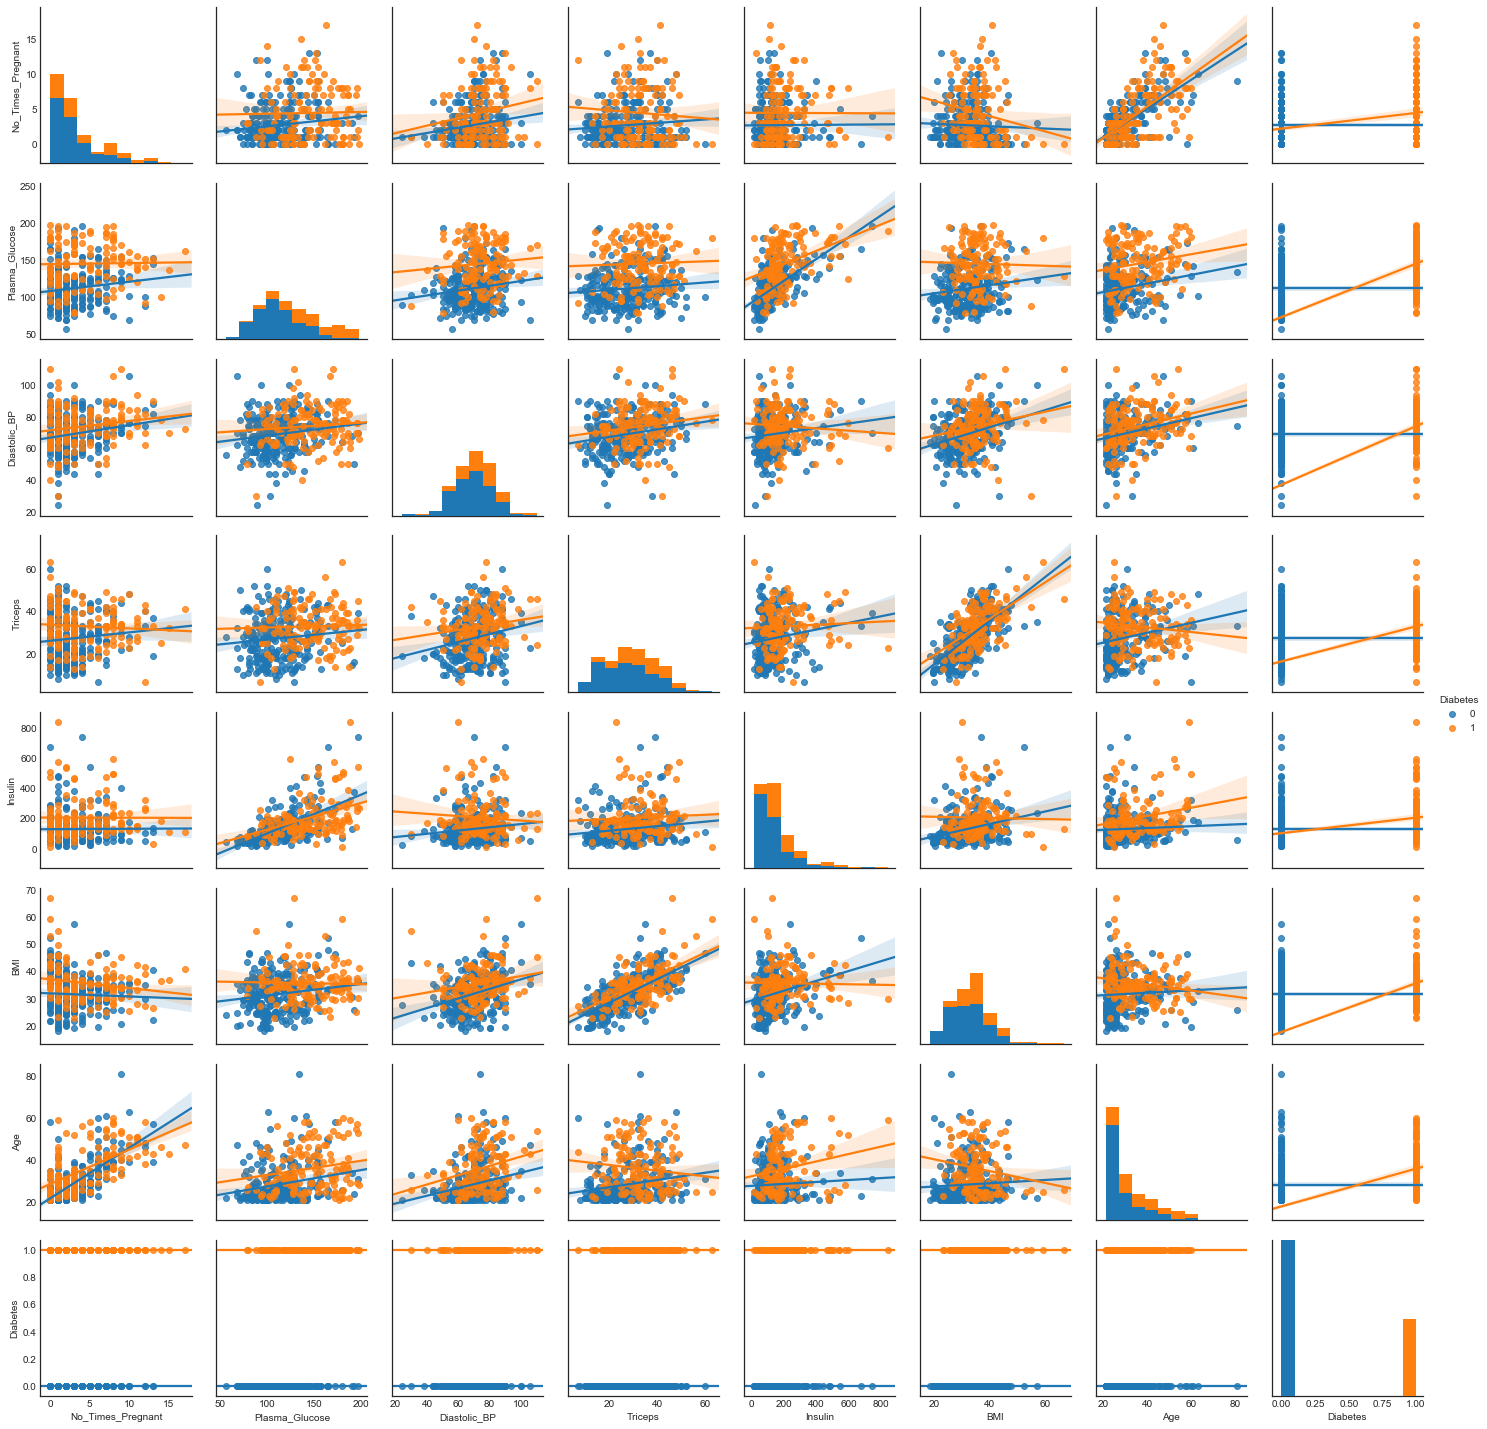

In [51]:
sns.pairplot(df,kind="reg",hue="Diabetes")

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [55]:
reg = LogisticRegression()

In [64]:
df_x=pd.DataFrame(df.drop("Diabetes",axis=1))
df_y= pd.DataFrame(df.Diabetes)

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=20)
reg.fit(x_train,y_train)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
a=reg.predict(x_test)

In [73]:
np.mean((pd.DataFrame(a)-y_test)**2)

0          NaN
Diabetes   NaN
dtype: float64

In [72]:
a

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)